## <a href="https://school.programmers.co.kr/learn/courses/30/lessons/178870?language=python3"> 연속된 부분 수열의 합</a>

비내림차순으로 정렬된 수열이 주어질 때, 다음 조건을 만족하는 부분 수열을 찾으려고 합니다.

기존 수열에서 임의의 두 인덱스의 원소와 그 사이의 원소를 모두 포함하는 부분 수열이어야 합니다.
부분 수열의 합은 k입니다.
합이 k인 부분 수열이 여러 개인 경우 길이가 짧은 수열을 찾습니다.
길이가 짧은 수열이 여러 개인 경우 앞쪽(시작 인덱스가 작은)에 나오는 수열을 찾습니다.
수열을 나타내는 정수 배열 sequence와 부분 수열의 합을 나타내는 정수 k가 매개변수로 주어질 때, 위 조건을 만족하는 부분 수열의 시작 인덱스와 마지막 인덱스를 배열에 담아 return 하는 solution 함수를 완성해주세요. 이때 수열의 인덱스는 0부터 시작합니다.

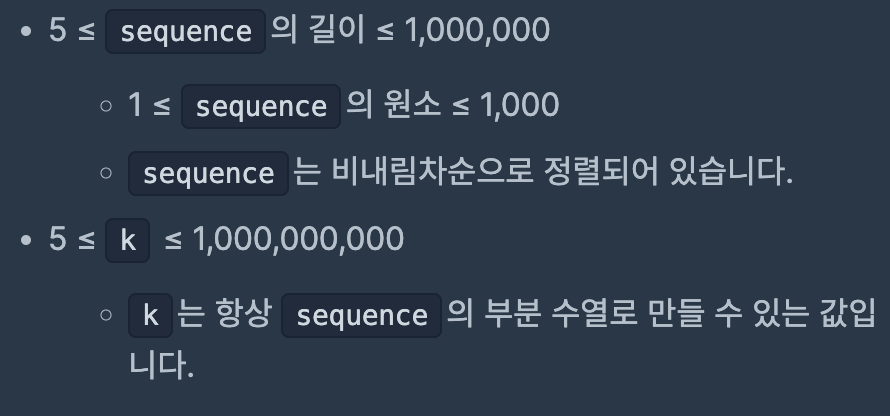

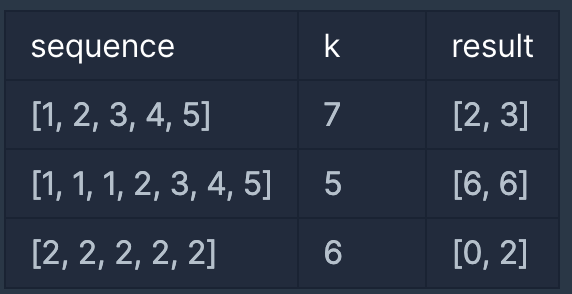

In [2]:
[[] for i in range(5)]

[[], [], [], [], []]

In [8]:
def solution(sequence, k):
    seq = []
    i = 0

    while True:
        if i == len(sequence):
            break
        
        tmp = []
        
        for idx in range(i, len(sequence)):
            tmp.append(sequence[idx])
            
            if sum(tmp) == k:
                seq.append(tmp)
                break
            elif sum(tmp) > k:
                break
        i += 1
            
    answer = []
    return answer

In [9]:
solution([1, 2, 3, 4, 5], 7)

IndexError: list index out of range